Collect Time Series data for a location

In [1]:
# https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/56.224051%252C-5.2130074/2019-05-03/2022-02-15?include=fcst%2Cobs%2Chistfcst%2Cstats%2Cdays&key=6FF9G8N2T2NZCSR2C2WPZ42QF&options=preview&contentType=json
import requests
import pandas as pd
import numpy as np

API_KEY = '6FF9G8N2T2NZCSR2C2WPZ42QF'
WEATHER_endpoint = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'
desired_features = ['temp','visibility','wspd','cloudcover','precip','sealevelpressure','dew','wgust','humidity']

def getTimeSeries(latitudes,longitudes,dateStart,dateEnd):
    query_params = '{},{}/{}/{}?unitGroup=metric&elements=datetime%2Ctemp%2Cdew%2Chumidity%2Cprecip%2Cwindgust%2Cwindspeed%2Cpressure%2Ccloudcover%2Cvisibility&include=obs&key={}&contentType=json'
    query_params=query_params.format(latitudes,longitudes,dateStart,dateEnd,API_KEY)
    try:
        r = requests.get(WEATHER_endpoint + query_params,verify = False)
        weatherInfo = r.json()
    except Exception:
        weatherInfo = []
        print('Problem loading weather data for query params' + query_params +"\n"+ Exception)
    if weatherInfo:
        try:
            timeSeries = pd.DataFrame(weatherInfo['days'])
            # statsSeries = (pd.DataFrame(list(timeSeries['normal'])))
            # timeSeries = timeSeries.drop('normal',axis=1)
            timeSeries['windgust'].replace(np.NaN, 0, inplace=True)
        except:
            pass
    else:
        print('error')
    timeSeries.to_csv('../Data/TimeSeriesOfLocations/' + str(latitudes) + '_' + str(longitudes) + '.csv')
    return weatherInfo
    # statsSeries.to_csv('../Data/TimeSeriesOfLocations/MinMeanMax_' + str(latitudes) + '_' + str(longitudes) + '.csv')

weatherinfo = getTimeSeries(55.346149432626284,-4.062504193857615,'2019-09-01','2022-02-15')
# print(weatherinfo)

C:\Users\james\AppData\Roaming\Python\Python39\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'weather.visualcrossing.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Plot Raw Graph

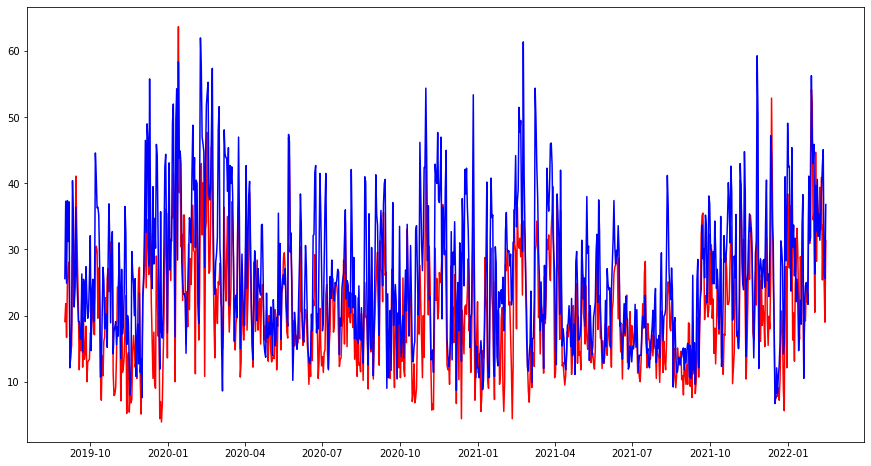

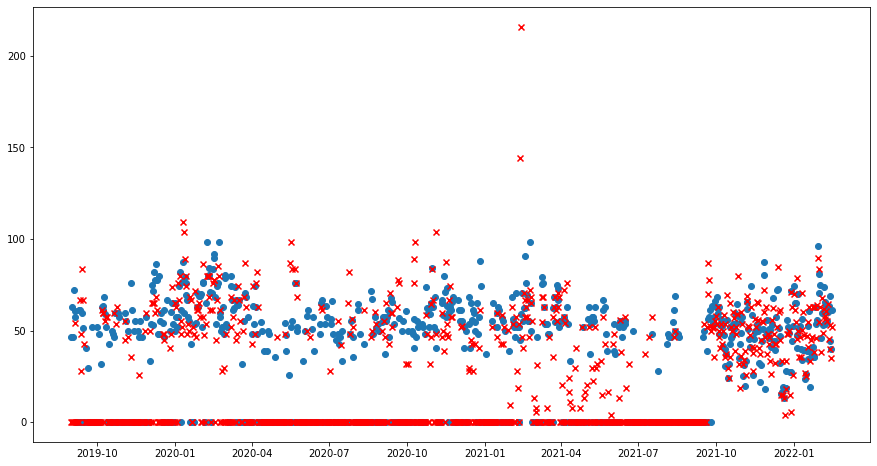

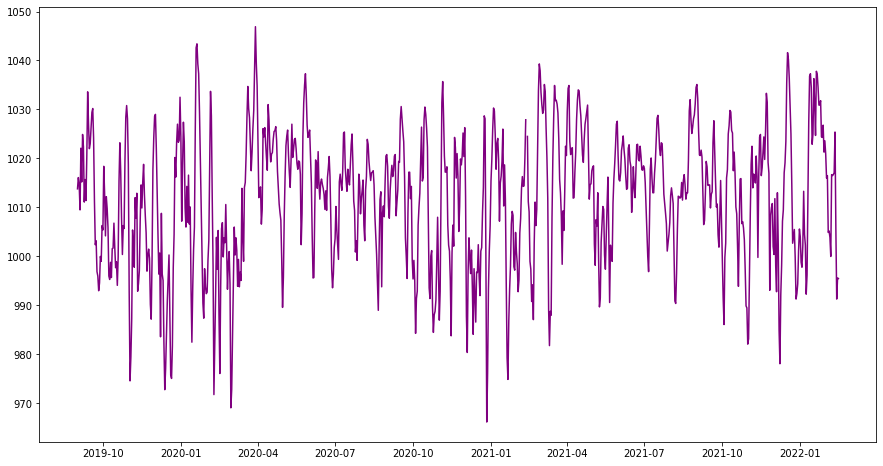

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
dataset = pd.read_csv('../Data//TimeSeriesOfLocations/55.346149432626284_-4.062504193857615.csv',parse_dates=["datetime"])
dataset2 = pd.read_csv('../Data/TimeSeriesOfLocations/57.23963580566568_-4.695464890442125.csv',parse_dates=["datetime"])
# print(dataset)
plt.figure(figsize=(15, 8))
plt.plot(dataset2['datetime'],dataset2['windspeed'],color='red')
plt.plot(dataset['datetime'],dataset['windspeed'],color='blue')

plt.figure(figsize=(15, 8))
plt.scatter(dataset['datetime'],dataset['windgust'],marker='o')
plt.scatter(dataset2['datetime'],dataset2['windgust'],marker='x',color='red')

plt.figure(figsize=(15, 8))
plt.plot(dataset['datetime'],dataset['pressure'],color='purple')

In [ ]:
dataset2 = pd.read_csv('../Data//TimeSeriesOfLocations/MinMeanMax_56.224051_-5.2130074.csv')
plt.figure(figsize=(15, 8))
print((dataset2.windspeed.apply(lambda x: float(x.split(',')[1].replace('[','').replace(']','')))))
plt.plot(dataset['datetime'],(dataset2.windspeed.apply(lambda x: float(x.split(',')[2].replace('[','').replace(']','')))),color='red')
plt.plot(dataset['datetime'],dataset['windspeed'],color='green')
plt.plot(dataset['datetime'],(dataset2.windspeed.apply(lambda x: float(x.split(',')[0].replace('[','').replace(']','')))),color='blue')

plt.figure(figsize=(15, 8))
print((dataset2.windgust.apply(lambda x: float(x.split(',')[1].replace('[','').replace(']','')))))
plt.scatter(dataset['datetime'],(dataset2.windgust.apply(lambda x: float(x.split(',')[2].replace('[','').replace(']','')))),color='red',marker='x')
plt.scatter(dataset['datetime'],dataset['windgust'],color='green',marker='x')
plt.scatter(dataset['datetime'],(dataset2.windgust.apply(lambda x: float(x.split(',')[0].replace('[','').replace(']','')))),color='blue',marker='x')

Smooth with average window

In [ ]:
from ipywidgets import interact
dataset = pd.read_csv('../Data//TimeSeriesOfLocations/55.44617453329307_-3.5992929982061717.csv',parse_dates=["datetime"])
# print(dataset)
# feature = 'windspeed'
@interact(alpha=(1,1000),feature=['windspeed','windgust','pressure','temp','dew','cloudcover','visibility'])
def graphdraw(alpha,feature):
    rawwindspeedData = dataset[['datetime',feature]]
    plt.figure(figsize=(15, 8))
    plt.scatter(dataset['datetime'],dataset[feature],color='magenta',marker='x')
    smoothedData = rawwindspeedData.ewm(alpha=alpha/1000).mean()
    plt.plot(dataset['datetime'],smoothedData[feature],color='black')
    print(smoothedData.mean())
    print(smoothedData.std())